In [294]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import matplotlib.image as  mpimg
%matplotlib inline
import math
from operator import itemgetter

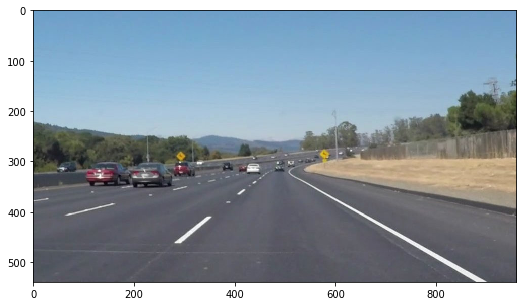

In [355]:
img1 = cv2.imread('images/road1.jpg')
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,5))
plt.imshow(img1)
gray = np.copy(img1)
gray = cv2.cvtColor(gray,cv2.COLOR_RGB2GRAY)

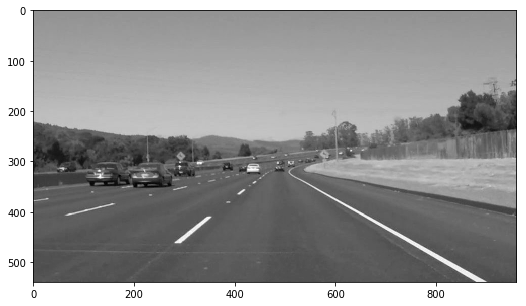

In [356]:
plt.figure(figsize=(10,5))
plt.imshow(gray,cmap='gray')

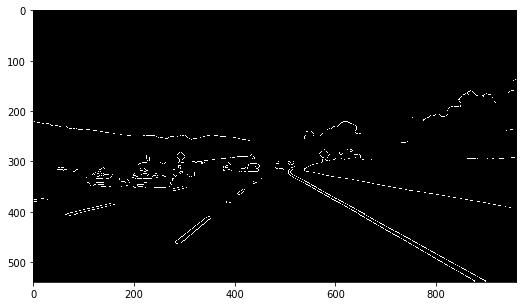

In [357]:
blur = np.copy(gray)
blur = cv2.GaussianBlur(blur,(9,9),0)
canny = cv2.Canny(blur,255/3,255/2)
plt.figure(figsize=(10,5))
plt.imshow(canny,cmap='gray')

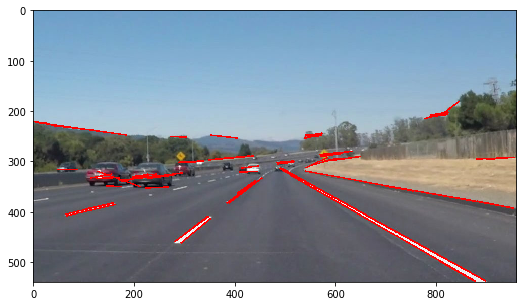

In [358]:
hough_img = np.copy(img1)
lines = cv2.HoughLinesP(canny,1,np.pi/180,10,0,30,20)
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(hough_img,(x1,y1),(x2,y2),(255,0,0),2)
plt.figure(figsize=(10,5))
plt.imshow(hough_img)


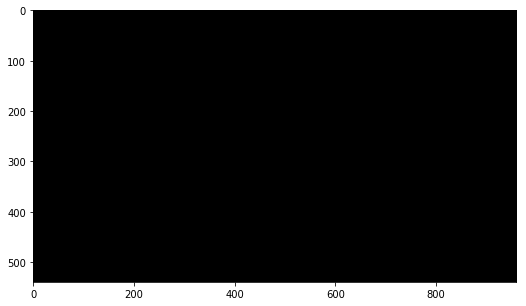

In [359]:
img2 = np.zeros(canny.shape,dtype=np.int8)
plt.figure(figsize=(10,5))
plt.imshow(img2,cmap='gray')

In [360]:
vertices = np.array([[0,img2.shape[0]],[img2.shape[1],img2.shape[0]],[5*(img2.shape[1])/10,310],[5*(img2.shape[1])/10,310]],np.int32)
cv2.fillPoly(img2,[vertices],255)
plt.figure(figsize=(10,5))
#plt.imshow(img2,cmap='gray')

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

(540, 960) (540, 960)


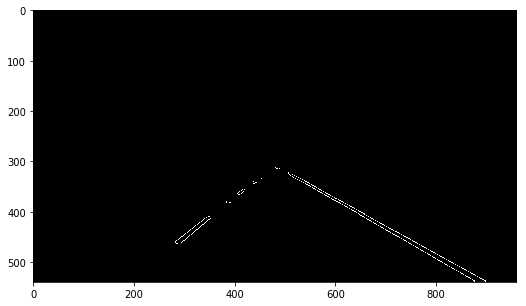

In [361]:
print(img2.shape,canny.shape)
masked = cv2.bitwise_and(canny,canny,mask = img2)
plt.figure(figsize=(10,5))
plt.imshow(masked,cmap='gray')

19


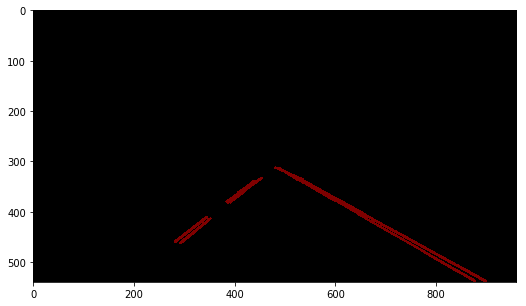

In [362]:
lane = np.zeros(img1.shape,dtype=np.int8)
lines = cv2.HoughLinesP(masked,1,np.pi/180,10,0,20,20)
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(lane,(x1,y1),(x2,y2),(255,0,0),3)
plt.figure(figsize=(10,5))
plt.imshow(lane,cmap='gray')
print(len(lines))

In [363]:
slopes = []
lane_right = []
lane_left = []
slope_left = []
slope_right = []
for line in lines:
    for x1,y1,x2,y2 in line:
        slope = math.degrees(math.atan2((y2-y1),(x2-x1)))
        if(slope > 0):
            slope_right.append(slope)
            lane_right.append([[x1,y1,x2,y2]])
        elif(slope < 0):
            slope_left.append(slope)
            lane_left.append([[x1,y1,x2,y2]])

[ 0.56350651 39.07866561]


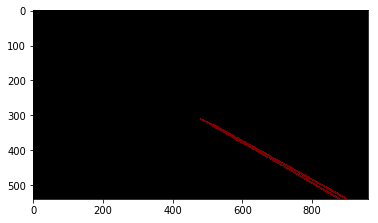

In [364]:
test_right = np.zeros(lane.shape,np.int8)
X_right = []
Y_right = []
for l in lane_right:
    #print(l)
    for x1,y1,x2,y2 in l:
        cv2.line(test_right,(x1,y1),(x2,y2),(255,0,0),3)
        X_right += [x1,x2]
        Y_right += [y1,y2]
        Z_right = np.polyfit(X_right,Y_right,1)       

plt.imshow(test_right,cmap='gray')
print(Z_right)

[ -0.79296655 688.59524775]


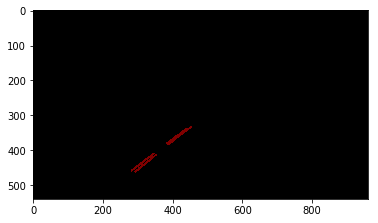

In [365]:
test_left = np.zeros(lane.shape,np.int8)
X_left = []
Y_left = []
for l in lane_left:
    #print(l)
    for x1,y1,x2,y2 in l:
        cv2.line(test_left,(x1,y1),(x2,y2),(255,0,0),3)
        X_left += [x1,x2]
        Y_left += [y1,y2]
        Z_left = np.polyfit(X_left,Y_left,1)

plt.imshow(test_left,cmap='gray')
print(Z_left)

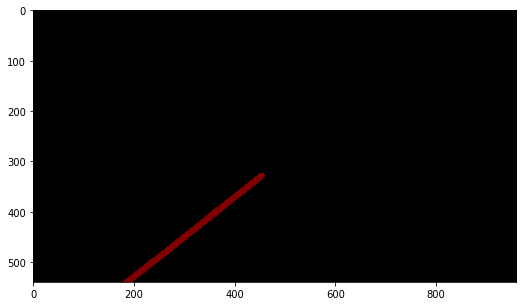

In [366]:
f_left = np.poly1d(Z_left)
test_left_extrapolate = np.zeros(lane.shape,np.int8)
cv2.line(test_left_extrapolate,(0,int(f_left(0))),(max(X_left),int(f_left(max(X_left)))),(255,0,0),12)
plt.figure(figsize =(10,5))
plt.imshow(test_left_extrapolate,cmap='gray')

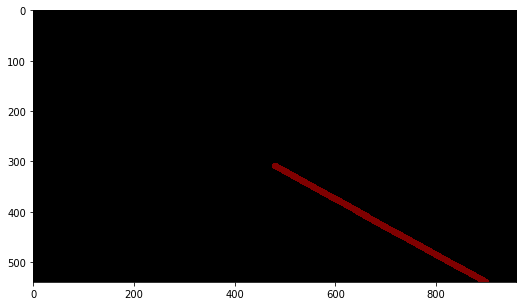

In [367]:
f_right = np.poly1d(Z_right)
test_right_extrapolate = np.zeros(lane.shape,np.int8)
cv2.line(test_right_extrapolate,(min(X_right),int(f_right(min(X_right)))),(max(X_right),test_right_extrapolate.shape[0]),(255,0,0),12)
plt.figure(figsize =(10,5))
plt.imshow(test_right_extrapolate,cmap='gray')

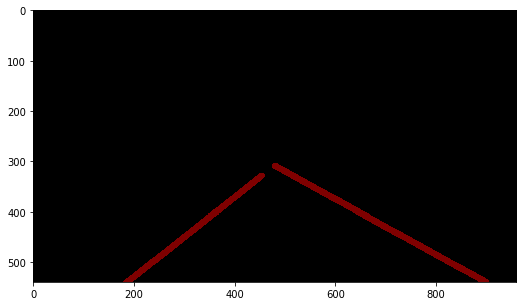

In [368]:
final_lanes = np.zeros(lane.shape,np.int8)
final_lanes = test_right_extrapolate + test_left_extrapolate
#final_lanes = cv2.addWeighted(test_right_extrapolate,0.5,test_left_extrapolate,0.5,0)
plt.figure(figsize =(10,5))
plt.imshow(final_lanes,cmap='gray')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


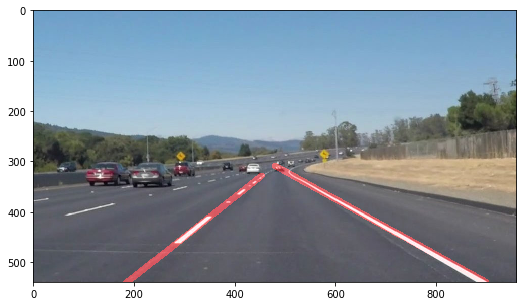

In [369]:
final_image = np.copy(img1)
final_image = img1 + final_lanes
plt.figure(figsize =(10,5))
plt.imshow(final_image, cmap='gray')

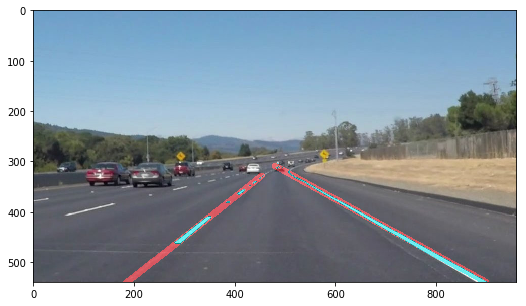

In [370]:
plt.figure(figsize =(10,5))
final_image =final_image/255
plt.imshow((final_image * 255).astype(np.uint8))